# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [15]:
from scipy import stats 
import numpy as np

In [16]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [20]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
GPU1_Mean = GPU1.mean()
print("Mean :",GPU1_Mean)
S = np.std(GPU1,ddof=1)
t_statistic, p_value = ttest_1samp(GPU1, GPU1_Mean)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("Alternate hypothesis is that it is not equal to zero")


Mean : 10.333333333333334
T-Statistic =  0.0
P-Value =  1.0
Alternate hypothesis is that it is not equal to zero


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [21]:
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU2 )
print("P Value =",p_value)

P Value = 0.02346537162637542


In [25]:
# p value is 2.3% and it is less than 5% level of significance
print("Null Hypothesis : There is no significant difference between data sets")

Null Hypothesis : There is no significant difference between data sets


## Question 3

He is trying a third GPU - GPU3.

In [27]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [28]:
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU3 )
print("P Value =",p_value)


P Value = 0.13520778142018045


In [31]:
print("p value is 13.5% and it is more than 5% level of significance")
print("Alternate Hypothesis : There is a significant difference")

p value is 13.5% and it is more than 5% level of significance
Alternate Hypothesis : There is a significant difference


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [23]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

T-Statistic =  2.6741725711150446
P_Value =  0.12259792666001798
P_Value is greater than 5% hence Failed to the Reject Null.
One-Way ANOVA Test
F-Value =  2.51357622845924
P-Value =  0.13574644501798466
P-Value is greater than 0.05 hence failed to Reject Null.
verify the overlapping :


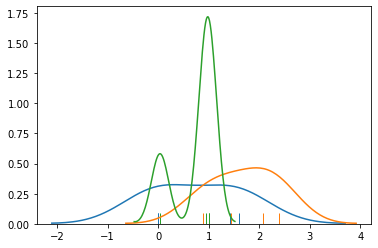

In [32]:
from scipy.stats import levene
import seaborn as sns
t_statistic, p_value = levene(e1, e2, e3)
print("T-Statistic = ", t_statistic)
print("P_Value = ", p_value)
print("P_Value is greater than 5% hence Failed to the Reject Null.")
print("One-Way ANOVA Test")
F_value, p_value = stats.f_oneway(e1, e2, e3)
print("F-Value = ", F_value)
print("P-Value = ", p_value)
print("P-Value is greater than 0.05 hence failed to Reject Null.")
print("verify the overlapping :")
sns.distplot(e1, hist=False, rug=True)
sns.distplot(e2, hist=False, rug=True)
sns.distplot(e3, hist=False, rug=True)
plt.show()


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [34]:
F, p = stats.f_oneway(e1, e2, e3)
print("F-Value = ", F)
print("P-Value = ", p)
print("P-Value is lesser than 0.05 hence rejecting Null Hypothesis")

F-Value =  2.51357622845924
P-Value =  0.13574644501798466
P-Value is lesser than 0.05 hence rejecting Null Hypothesis


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I error
When the null hypothesis is true and you reject it, you make a type I error. The probability of making a type I error is α, which is the level of significance you set for your hypothesis test. An α of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis. To lower this risk, you must use a lower value for α. However, using a lower value for alpha means that you will be less likely to detect a true difference if one really exists.
/n
Type II error
When the null hypothesis is false and you fail to reject it, you make a type II error. The probability of making a type II error is β, which depends on the power of the test. You can decrease your risk of committing a type II error by ensuring your test has enough power. You can do this by ensuring your sample size is large enough to detect a practical difference when one truly exists.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


In [13]:
print("The null hypothesis is a general statement or default position that there is nothing new happening")
print("Ho = 4.5 (min)")
print("Ha != 4.5 ( not equal to 4.5 or greater than / less than 4.5)")

The null hypothesis is a general statement or default position that there is nothing new happening
Ho = 4.5 (min)
Ha != 4.5 ( not equal to 4.5 or greater than / less than 4.5)


## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [1]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [41]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

chi_sq_Stat, p_value, deg_freedom, contigency = stats.chi2_contingency(dice)

print("Chi2 Statistics =", chi_sq_Stat)
print("P-Value = ", p_value)
print("Degrees of Freedom = ", deg_freedom)
print("Contingency Table: \n", contigency)


Chi2 Statistics = 23.315671914716496
P-Value =  0.07766367301496693
Degrees of Freedom =  15
Contingency Table: 
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


In [ ]:
stats.chi2_contingency(dice, correction=False, lambda_=None)

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [4]:
from scipy import stats
z_scores = stats.zscore(dice)
z_scores

array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

In [5]:
p_values = stats.norm.sf(abs(z_scores))
p_values

array([[0.32171442, 0.42510621, 0.03309629, 0.07477068],
       [0.08245741, 0.26041025, 0.11033568, 0.5       ],
       [0.17726974, 0.23649578, 0.27014569, 0.07477068],
       [0.17726974, 0.05217856, 0.27014569, 0.16833418],
       [0.08245741, 0.48493574, 0.5       , 0.5       ],
       [0.32171442, 0.06074513, 0.27014569, 0.16833418]])

In [6]:
p_values.mean()

0.23428473233691496

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [8]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [42]:
t_statistic, p_value  =  stats.ttest_rel(before,after,axis=0)
print('P Value %1.3f' % p_value)
print("P-Value is less than 5% hence rejecting Null Hypothesis")

P Value 0.000
P-Value is less than 5% hence rejecting Null Hypothesis
